<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Jorge/blob/main/sub_arreglo_maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**
**Entrada**: Un conjunto de n numeros $[a_1, a_n]$.

**Salida**: Sub- arreglo $[a_i',a_j']$ tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.  

El algoritmo del sub-arreglo maximo es un metodo de ordenamiento que por medio de la division de un arreglo en dos partes (desde la mitad) logra generar un sub arreglo antes de la mitad y despues de la mitad logrando asi un sub arreglo maximo entre los dos. 


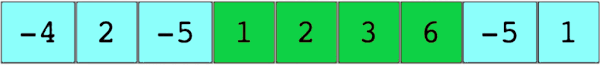


# 2.Algoritmo MaxSubArray

A continuacion se mostrara el funcionamiento tanto del **MaxSubArrayMid** como de **MaxSubArray**.





In [2]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored


In [3]:
def MaxSubArrayMid(A, izquierda, mitad, derecha, verbose, cont):
  sumaIzq = -100000000000
  suma = 0

  for i in range(mitad, izquierda - 1, -1): #Busca el mayor en forma descendente.
    suma = suma + A[i]
    cont = cont + 1
    if suma > sumaIzq:
      sumaIzq = suma
      maxIzq = i

  sumaDer = -100000000000
  suma = 0

  for j in range(mitad + 1, derecha + 1): #Busca el mayor en forma ascendente.
    cont = cont + 1
    suma = suma + A[j]
    if suma > sumaDer:
      sumaDer = suma
      maxDer = j

  #print(maxIzq)
  #print(maxDer)
  #print(A[maxIzq:maxDer])
  if verbose :
    print("Suma desde los laterales en busca de encontrar la suma maxima: ",colored(f"{str(A[maxIzq])}","yellow"),",",colored(f"{str(A[maxDer])}","green"), "Suma =",sumaIzq+sumaDer)
  #print(colored(f"{str(A[:])}","red"))
  return maxIzq, maxDer, sumaIzq + sumaDer, cont #Retorna los indices y la suma maxima.

In [4]:
def MaxSubArray(A, izquierda, derecha, verbose = False, cont = 0):
  #if verbose:
    #print(colored(f"{str(A[:])}","yellow"),",",colored(f"{str(A[:])}","green"))
    #print("hola")
  if derecha == izquierda:
    return izquierda, derecha, A[izquierda], cont
  else:
    mitad = (izquierda + derecha)//2
    izqIzquierda, izqDerecha, izqSuma, cont = MaxSubArray(A, izquierda, mitad, verbose, cont)
    derIzquierda, derDerecha, derSuma, cont = MaxSubArray(A, mitad + 1, derecha, verbose, cont)
    medIzquierda, medDerecha, medSuma, cont = MaxSubArrayMid(A, izquierda, mitad, derecha, verbose, cont) #Realiza comparaciones para conseguir el maximo izquierdo y maximo derecho.
    if verbose:
      print(colored(f"{str(A[medIzquierda:medDerecha + 1])}","red"))

    if izqSuma >= derSuma and izqSuma >= medSuma: #Devuelve los indices del arreglo con la suma maxima y su suma.
      return izqIzquierda, izqDerecha, izqSuma, cont
    else:
      if derSuma >= izqSuma and derSuma >= medSuma:
        return derIzquierda, derDerecha, derSuma, cont
      else:
        return medIzquierda, medDerecha, medSuma, cont
  





Entrada: $a=[-4,-5,6,7,8,-2,-12,11,]$

Salida: $a=[6, 7, 8]$

# 2.2. Descripcion del algoritmo
El algoritmo recibe un conjunto de numeros aleatorios en un arreglo y devuelve como resultado el arreglo con la suma maxima

1. Se divide el arreglo en 2 tal como en el mergeSort y buscamos de manera recursiva el sub-arreglo maximo de cada mitad.

2. Se busca el sub-arreglo maximo en donde este contenido el punto divisorio entre ambos arreglos.

3. Por ultimo se procede a comparar los tres sub-arreglos y el que de la suma maxima de ellos sera retornado como el sub-arreglo maximo.

# 2.3. Ejemplo
$A = [2,4,-1,-7,-8,-1]$

En el primer paso se realiza la particion por la mitad de nuestro arreglo "a", en caso de ser par quedan dos sub arreglos del mismo tamaño a diferencia de que este sea impar donde quedara dos sub arreglos de distintos tamaños.

  $[2, 4, -1] , [-7, -8, -1]$

Posteriormente se procede a encontrar la combinacion que de como resultado la suma maxima de los dos sub-arreglos.

  $[2, 4] = 6$

  $[2, 4, -1] = 5$

  $[-7, -8] = -15$

  $[-8, -1] = -9$

Por ultimo se genera un tercer arreglo que incluya la division entre ambos en busca de la suma maxima, para despues comparar los resultados obtenidos tras las sumas anteriormente vistas y generar el sub-arreglo maximo.

 $[2, 4, -1, -7] = -2$

  Por lo que el arreglo con la suma maxima es:
  
  $[2, 4] = 6$

# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

In [5]:
A = [-4,-5,6,7,8,-2,-12,11,]
print(A)
print("Separacion en dos partes del arreglo")
print(colored(f"{str(A[0:len(A)//2])}","yellow"),",",colored(f"{str(A[len(A)//2:])}","green"))
cont = 0
low, high , c, cont= MaxSubArray(A, 0, len(A) - 1, True, cont)

print("Arreglo con la suma maxima",A[low:high+1])
print(cont)

[-4, -5, 6, 7, 8, -2, -12, 11]
Separacion en dos partes del arreglo
[-4, -5, 6, 7] , [8, -2, -12, 11]
Suma desde los laterales en busca de encontrar la suma maxima:  -4 , -5 Suma = -9
[-4, -5]
Suma desde los laterales en busca de encontrar la suma maxima:  6 , 7 Suma = 13
[6, 7]
Suma desde los laterales en busca de encontrar la suma maxima:  -5 , 7 Suma = 8
[-5, 6, 7]
Suma desde los laterales en busca de encontrar la suma maxima:  8 , -2 Suma = 6
[8, -2]
Suma desde los laterales en busca de encontrar la suma maxima:  -12 , 11 Suma = -1
[-12, 11]
Suma desde los laterales en busca de encontrar la suma maxima:  8 , 11 Suma = 5
[8, -2, -12, 11]
Suma desde los laterales en busca de encontrar la suma maxima:  6 , 8 Suma = 21
[6, 7, 8]
Arreglo con la suma maxima [6, 7, 8]
24


En cada iteracion se recorre:

*   Elemento de la lista
*   Elemento de la subLista

Color amarillo: Particion izquierda del arreglo/numero lateral izquierdo.

Color verde: Particion derecha del arreglo/numero lateral derecho.

Colore rojo: Sub-arreglo donde se esta realizando la suma de sus numeros.

Color blanco: Resultado de la suma de los sub-arreglos/resultado de la suma maxima de los sub-arreglos.

# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

El tiempo de ejecucion de este algoritmo en todos sus casos es de $O(n(log(n))$.

## Prueba del teorema

Para demostrar la complejidad de nuestro algoritmo de forma intuitiva necesitaremos hacer un arbol de recurrencia, para esto deberemos definir una funcion la cual explicara nuestro algoritmo de forma matematica, como por ejemplo:


$T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

Luego de esto podremos armar nuestro arbol de la siguiente forma:

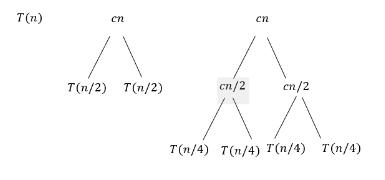



Hasta conseguir el arbol y los resultados de sus aproximaciones.

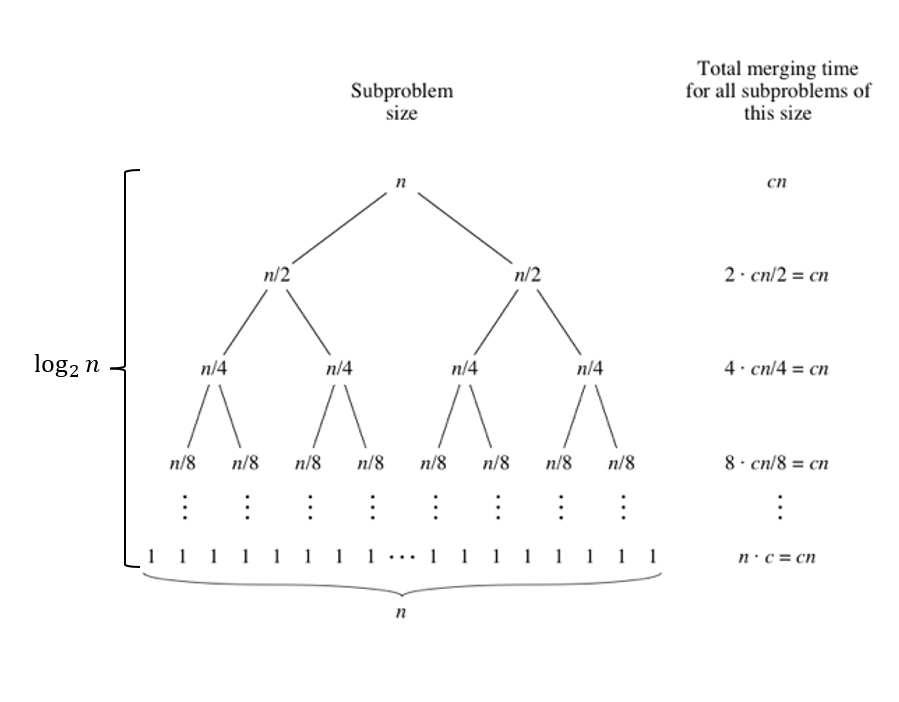

Finalmente analizando el árbol de recursión podemos decir que la suma de todos los tiempode es: $cn \log_2 n \rightarrow O(n \log n)$.

#Prueba del teorema 

Teniendo en cuenta el funcionamiento de nuestro algoritmo, este no nos deja del todo claro cual vendria siendo el mejor caso, peor caso o caso promedio, ya que este codigo sin importar el tamaño que tenga ira dividiendo un arreglo largo $n$ en 2 hasta que quede uno de largo 1, ya demas la funcion MaxSubArrayMid verificara todos los espacios del arreglo recibido. Por esta misma razon se realizara una comparacion con la cantidad de comparaciones que realiza nuestra funcion con la aproximacion matematica que deberia tener gracias a nuestro analisis del arbol recursivo.

In [16]:
for n in range(1,15):
  x = rd.sample(range(-100,100), n)
  a, sum, j,cont = MaxSubArray(x, 0, len(x)-1)
  print("Caso",n,":",x)
  print("Entradas al bucle =", cont, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")

Caso 1 : [24]
Entradas al bucle = 0 , Aproximación matemática = 0.0 

Caso 2 : [-77, -69]
Entradas al bucle = 2 , Aproximación matemática = 2.0 

Caso 3 : [30, -8, -20]
Entradas al bucle = 5 , Aproximación matemática = 4.0 

Caso 4 : [32, 26, -61, 38]
Entradas al bucle = 8 , Aproximación matemática = 8.0 

Caso 5 : [-89, -63, 45, 42, -10]
Entradas al bucle = 12 , Aproximación matemática = 11.0 

Caso 6 : [45, 79, -76, -85, -73, 94]
Entradas al bucle = 16 , Aproximación matemática = 15.0 

Caso 7 : [4, 31, -92, 58, -31, 2, -30]
Entradas al bucle = 20 , Aproximación matemática = 19.0 

Caso 8 : [87, -82, -21, -74, 97, -28, 51, 23]
Entradas al bucle = 24 , Aproximación matemática = 24.0 

Caso 9 : [-12, 88, 5, -69, 97, -83, -98, -17, 13]
Entradas al bucle = 29 , Aproximación matemática = 28.0 

Caso 10 : [89, -67, 59, 81, -28, -77, 20, 27, 14, -58]
Entradas al bucle = 34 , Aproximación matemática = 33.0 

Caso 11 : [-26, -31, 20, -44, 42, 21, -61, 64, -51, 26, -17]
Entradas al bucle = 39 

Como podemos ver en los calculos, la cantidad de comparaciones que realiza nuestra funcion es muy cercano al calculo matematico anteriormente mencionado. Por lo tanto podemos asumir que todos los casos del algoritmo tienen una complejidad de **O(nlogn)** 

# 4. Correctitud

### **Teorema (Correctitud).**

El agoritmo para encontrar el sub-arreglo maximo recibe como entrada una secuencia de numeros de tamaño $n$ ($[a_1,a_2,....a_n]$) y retorna un arreglo de largo m \leq n4 el cual contendra la secuencia con la suma maxima $[a_1',a_2',...a_m']$ donde $\sum\limits_{i = 1}^{n}ai \leq \sum\limits{i = 1}^{m}a_i'$.

## Prueba del Teorema

Como observamos anteriormente en nuestra funcion MaxSubArray va dividiendo nuestro arreglo de tamaño n en un sub-arreglo de largo $m = \frac{n}{2}$ hasta conseguir un array de largo 1 y por ultimo nuestra funcion MaxSubArrayMid buscara los sub-arreglos que hay en el medio del arreglo original recorriendolo por completo 

Por lo tanto para la funcion MaxSubArray puede ser demostrada por un analisis empirico.






##Prueba del Teorema para la (Funcion MaxSubArray)

####**Teorema 1**:

Esta funcion recibe una secuencia de $n$ numeros $[a_1,a_2,....,a_n]$ y retornara un sub-arreglo el cual contenga la suma maxima que se encuentre en el arreglo  de entrada. Salida: Una secuencia de $m$ numeros donde $m \leq n$ < $[a_1',a_2',....,a_n']$, donde $\sum\limits_{i = 0}^{n}a_i \leq\sum\limits_{i=0}^{m}a_i'$

##Demostracion

En induccion matematica para poder demostrar una declaracion P(n) debemos realizar los siguientes pasos.

>1.Probar un caso base $P(1)$ y comprobar si el algoritmo funciona correctamente.
>
>2.Luego probar si $P(m)$ donde $m < n$ es correcto por lo tanto para $P(n)$ tambien lo sera.

Para nuestro primer caso, nuestra funcion recibiria un arreglo de largo 1 $(n = 1)$, por lo tanto, como este tendra un solo elemento, se considerarara que ese unico elemento es la suma maxima por lo tanto para nuestro primer caso el algoritmo es correcto.

Para nuestro siguiente paso, la funcion recibira un arreglo de largo $n$ luego este sera dividido en dos sub-arreglos de largo $(m = \frac{n}{2})$ y esto ocurria hasta que el largo recibido por la funcion sea de $(n = 1)$ como nuestro caso base.
Por lo tanto se comprueba que nuestra funcion MaxSubArray funciona correctamente.

##Prueba del teorema (Función MaxSubArrayMid)

La función MaxSubArrayMid tiene como entrada un arreglo y la posición media del mismo (mid).

Su proposito es buscar dentro del arreglo un sub-arreglo que contenga la suma máxima de datos para luego retornarlo.

Para probarlo haremos uso de la propiedad invariante de bucle. Para esto debemos analizar la inicialización de nuestros bucles ($i = mid - 1$, $j = mid$) y probar si este se mantiene durante la ejecución de los ciclos.

> Al comienzo de cada iteración $i$ y $j$ serán las variables que irán en aumento en cada bucle, donde $i$ vendría siendo la posición anterior a la mitad del arreglo ingresado y $j$ vendría siendo la posición media de nuestro arreglo. Al finalizar cada bucle debe quedar como arreglo resultante el que tenga la mayor suma de datos.

###**Inicialización:**

Al comienzo de cada iteración (i = mid - 1, j = mid) los arreglos resultantes si o si tendrán la suma máxima de elementos ya que estos estarán compuestos de un solo elemento.

###**Mantención**

Empezamos considerando que al comienzo de cada iteración los arreglos resultantes de cada bucle serán aquellos que contengan la suma máxima de elementos (Como se puede apreciar en la figura).




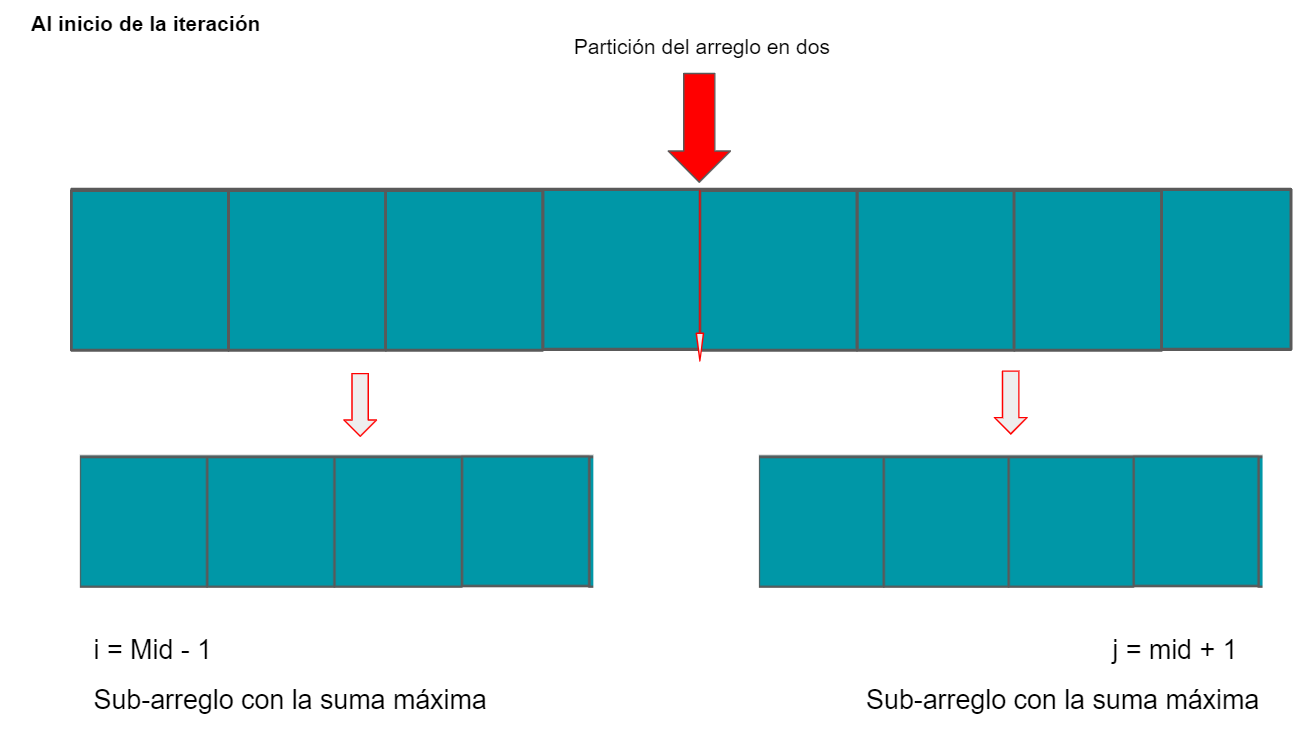




Durante la iteración el algoritmo verificará si el dato siguiente permite que está suma aumente, si es así, será añadido al arreglo resultante, en caso contrario se esperará hasta que avance a la siguiente iteración y lo agregará si la suma aumenta.

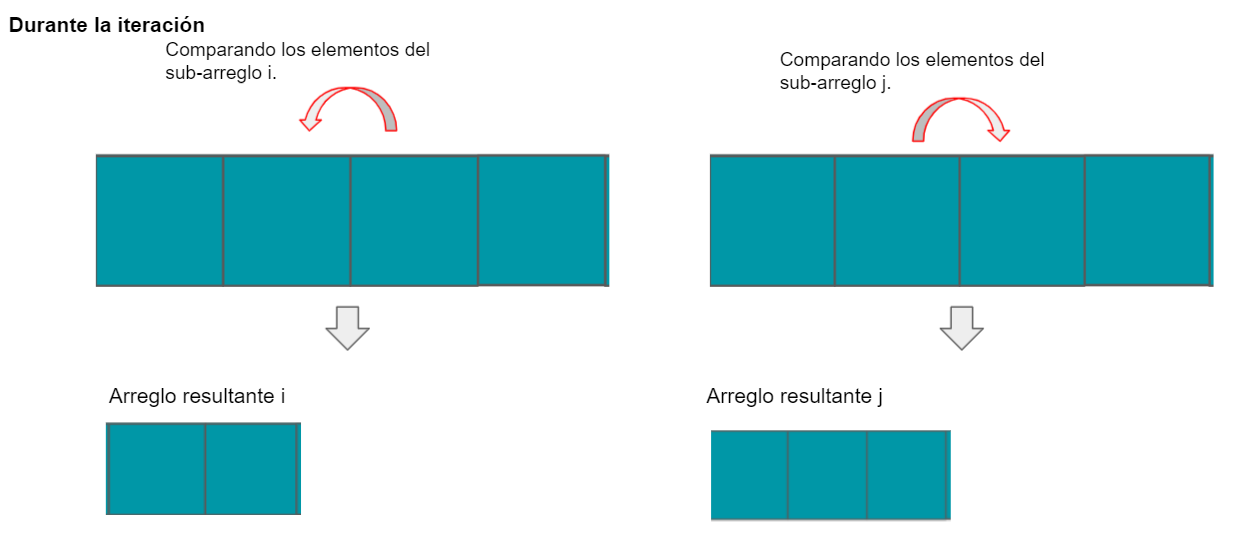

Al finalizar la iteración, el arreglo resultante será el que tenga la mayor suma hasta ese instante, por lo tanto se cumple la propiedad del bucle invariante.

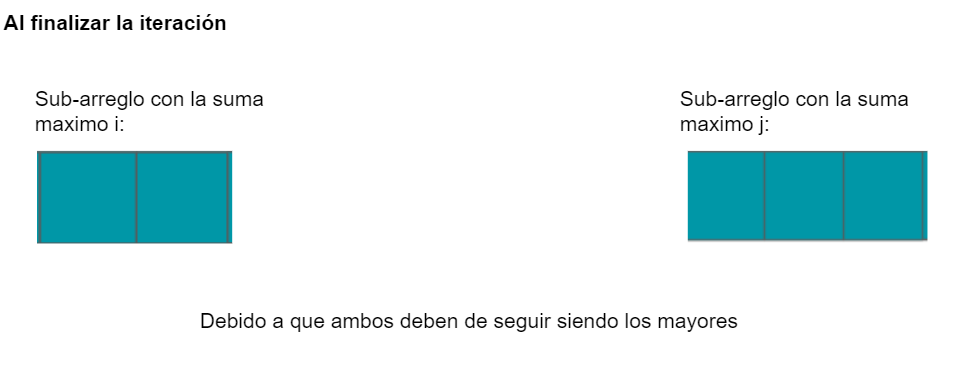

# 5. Experimentos

##5.1. Número compariciones

* Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
* Cantidad de comparaciones realizadas por el algoritmo Kadane y el de "divide y venceras".
* Comparación en el tiempo de ejecución del algoritmo Kadane y el de "divide y venceras".

Para problemas con $n ∈ [5,60]$.

Los arreglos de entrada son:

* Casos aleatorios: Las secuencias serán arreglos de números entre el -100 y el 100, con $n$ cantidad de elementos.

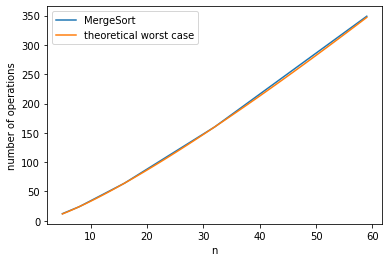

In [10]:
x=[n for n in range(5,60)] 
y1=[n* mt.log2(n) for n in range(5,60)] # caso promedio
y2= []
y=[];

for n in range(5,60):
  a = rd.sample(range(-100, 100), n)
  a,sum, b,counter  = MaxSubArray(a, 0, len(a) - 1)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MaxSubArray", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

Como podemos apreciar en el grafico anterior, la complejidad temporal del caso promedio y el de los casos experimentales son exactamente identicos, por lo tanto podemos confirmar que la complejidad de nuestro algoritmo es de $O(nlogn)$.

##Comparaciones entre la función Kadane y "Divide y venceras"

Los arreglos de entrada serán una secuencia de números aleatorios ya que la función kadane tampoco tiene un mejor o peor caso debido a que siempre tendrá que recorrer todo el array para poder ubicar el sub-arreglo con la suma máxima de elemetos.

##Codigo Kadane

In [11]:
#Algoritmo kadane

def kadane(lista):
  sumMax = lista[0]
  currentMax = lista[0]
  auxI = 0
  auxJ = 0
  cont = 0

  for i in range(0,len(lista)):
    currentMax += lista[i]
    cont += 1

    if currentMax < lista[i]:
      currentMax = lista[i] 

    if sumMax <= currentMax:
      sumMax = currentMax

  return sumMax, cont

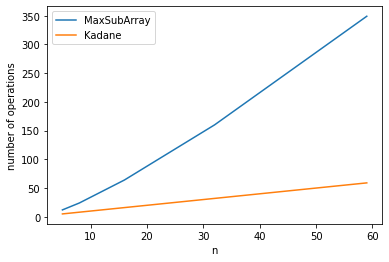

In [21]:
x=[n for n in range(5,60)] 
y=[]; 
y3 = []

for n in range(5,60):
  a = rd.sample(range(1, 100), n)
  b = a.copy()
  c,sum,o,counter = MaxSubArray(a,0,len(a)-1)
  r, counter2 = kadane(b)
  y.append(counter)
  y2.append(counter2)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["MaxSubArray", "Kadane"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

**Analisis de los resultados**

Como podemos apreciar en el grafico anterior, el algoritmo Kadane tiene una mejor complejidad que el algoritmo MaxSubArray ya que su complejidad viene dada por $O(n)$ y el del MaxSubArray es de $O(nlogn)$, por lo tanto el algortmo Kadane es mucho mejor en tiempo.

#5.2. Tiempo de ejecucion (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo MaxSubArray y kadane en función del tamaño del problema para arreglos generados aleatoreamente de largos entre 1 y 500.

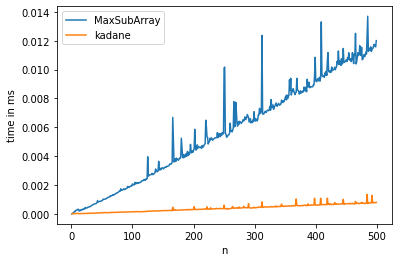

In [25]:
x=[]; y=[]
y2=[]

for n in range(1,500):

  a = rd.sample(range(1, 1000), n)
  b = a.copy()

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["MaxSubArray", "kadane"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

**Analisis de resultados**

Como podemos ver en el grafico anterior, los resultados del caso teorico se nos repiten, confirmando que el algoritmo kadane es mucho mejor en tiempo de ejecución en comparación al algoritmo MaxSubArrayMid.
